In [71]:
pip install clustergram

In [72]:
pip install urbangrammar_graphics

In [73]:
pip install kmodes

#Модуль 19

##Импортирую библиотеки и загружаю датасет

In [74]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from clustergram import Clustergram
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import urbangrammar_graphics as ugg
from kmodes.kprototypes import KPrototypes

In [75]:
df = pd.read_excel('/content/input_data.xlsx')
df_copy = df.copy()
df.head()

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0,12.41768,22660.000080,0.0,1
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0,17.38022,22660.000080,0.0,1
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1


##Кодирую категориальные данные

In [76]:
for column in df.columns:
    print(df[column].value_counts())

contract_num
ДСЖ-5/1539*****    1389
ТТЕ7227715*****     468
БТАСЕ273 -*****     267
ТТЕ7227778*****     225
ТМГО5Е7 № *****     123
                   ... 
ТМГЩ5Е7 № *****       3
БАЗАМПТЕ57*****       3
БАУБМСТЕ37*****       3
БАЛАМСТЕ56*****       3
БАБАМСТЕ55*****       3
Name: count, Length: 79, dtype: int64
product_name
Страхование путешественников        3591
Страхование путешественников USD     120
Name: count, dtype: int64
contract_status
Действует    3315
Завершен      396
Name: count, dtype: int64
currency_name
Российский рубль    3591
Доллар США           120
Name: count, dtype: int64
duration
14     1263
10     1152
7       333
365     111
30       96
15       87
16       72
22       66
18       63
17       57
21       48
13       39
12       39
19       36
28       36
25       36
26       30
11       27
20       27
23       27
24       24
29       24
27       18
Name: count, dtype: int64
country
Турция            1080
ОАЭ                495
Таиланд            303
Армения 

In [77]:
le = LabelEncoder()
enc = le.fit_transform(df['product_name'])
df['product_name'] = enc

le = LabelEncoder()
enc = le.fit_transform(df['contract_status'])
df['contract_status'] = enc

le = LabelEncoder()
enc = le.fit_transform(df['currency_name'])
df['currency_name'] = enc

le = LabelEncoder()
enc = le.fit_transform(df['sex'])
df['sex'] = enc

ohe = OneHotEncoder(sparse = False)
enc = ohe.fit_transform(df[['country']])
df[ohe.get_feature_names_out()] = enc
df.drop('country', axis=1, inplace=True)

df.drop('contract_num', axis=1, inplace=True)

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,product_name,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,...,country_Иран,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция
0,0,0,1,10,20,1,1096,2000000,0,12.41768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,7,55,1,1918,5000000,0,21.73094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,10,61,0,1096,2000000,0,12.41768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,14,25,1,1534,2000000,0,17.38022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,7,33,1,1918,5000000,0,21.73094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
for column in df.columns:
    print(df[column].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


##Нормирую датасет и провожу снижение размерности

In [79]:
ss = StandardScaler()
df_ss = ss.fit_transform(df)

In [80]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_ss)


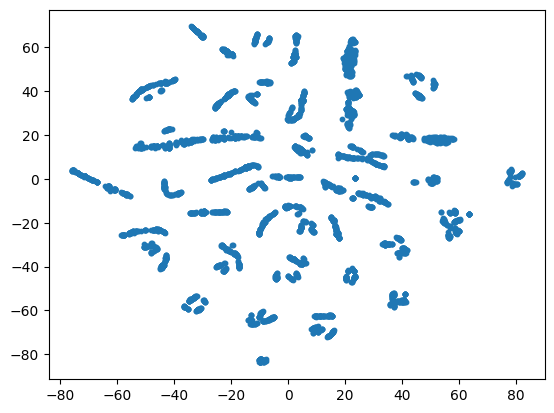

In [81]:
plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10)

##Применяю иерархическую кластеризацию

In [82]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=27).fit(df_ss)

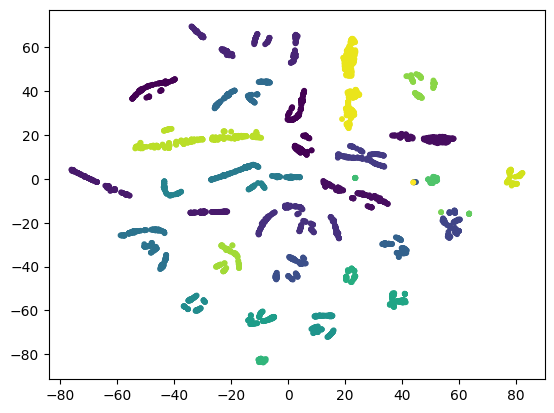

In [83]:
plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=clustering.labels_)

In [84]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

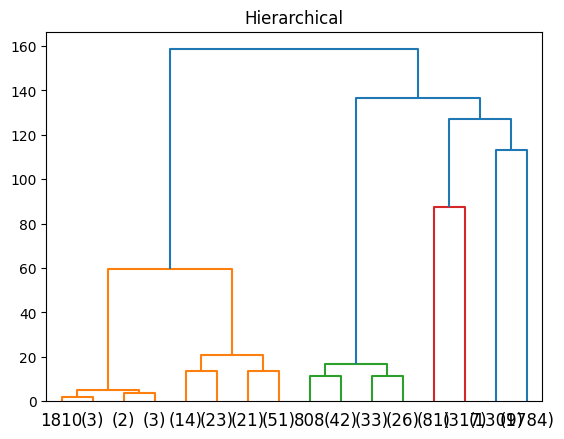

In [85]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=1).fit(df_ss)
plt.title('Hierarchical')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

##Применяю KMeans кластеризацию

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


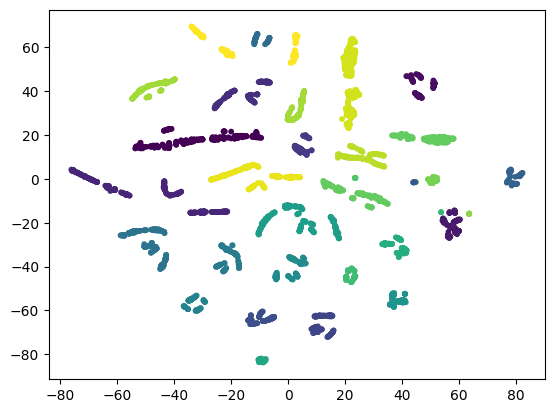

In [86]:
kmeans = KMeans(n_clusters=30).fit(df_ss)

plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=kmeans.labels_)

##Экспериментирую с количеством кластеров

In [87]:
wcss = []
silh=[]

for i in range(2,41):
    kmeans = KMeans(n_clusters = i, max_iter=300, n_init=10, random_state=23).fit(df_ss)
    preds = kmeans.predict(df_ss)
    wcss.append(kmeans.inertia_)
    silh.append(silhouette_score(df_ss, preds))



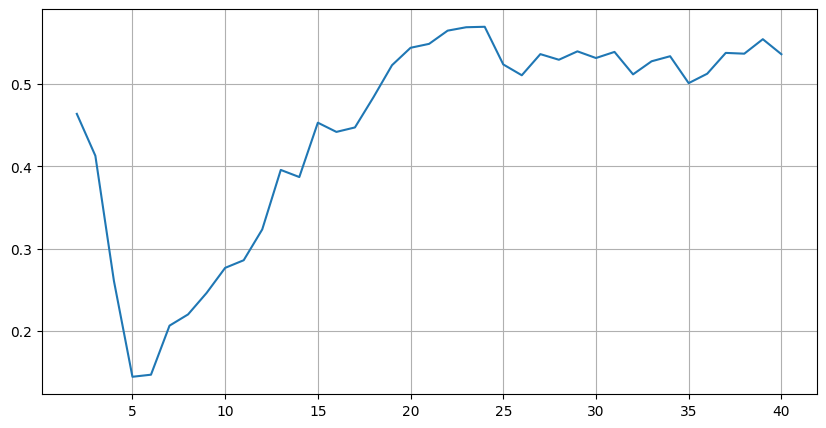

In [88]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 41), silh)
plt.grid()
plt.show()

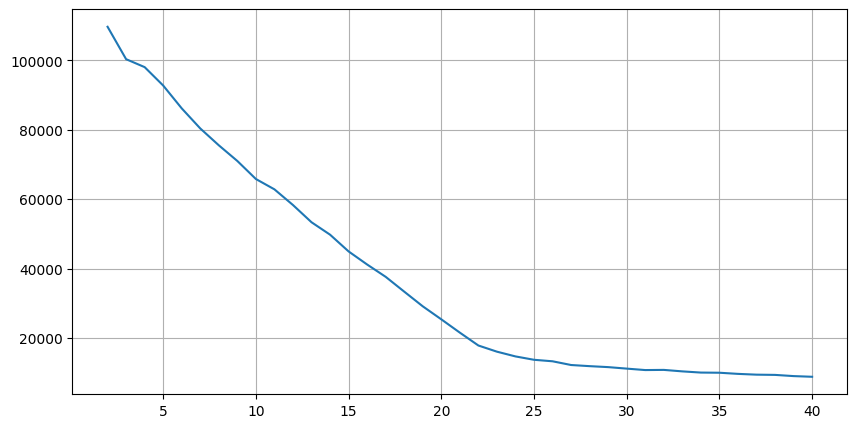

In [89]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 41), wcss)
plt.grid()
plt.show()

Оптималльное число кластеров=22

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


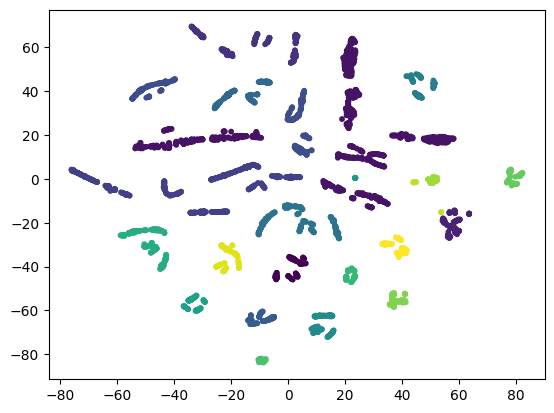

In [90]:
kmeans = KMeans(n_clusters=22).fit(df_ss)

plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=kmeans.labels_)

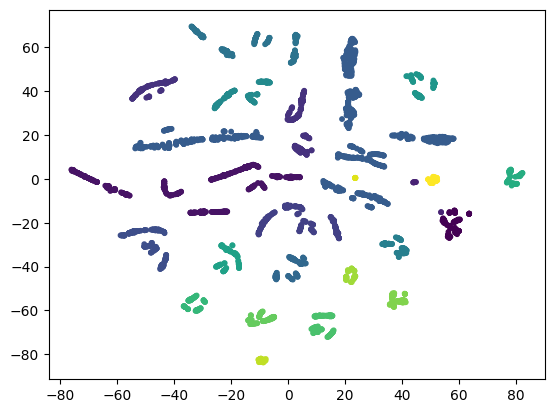

In [91]:
clustering = AgglomerativeClustering(n_clusters=22).fit(df_ss)
plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=clustering.labels_)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


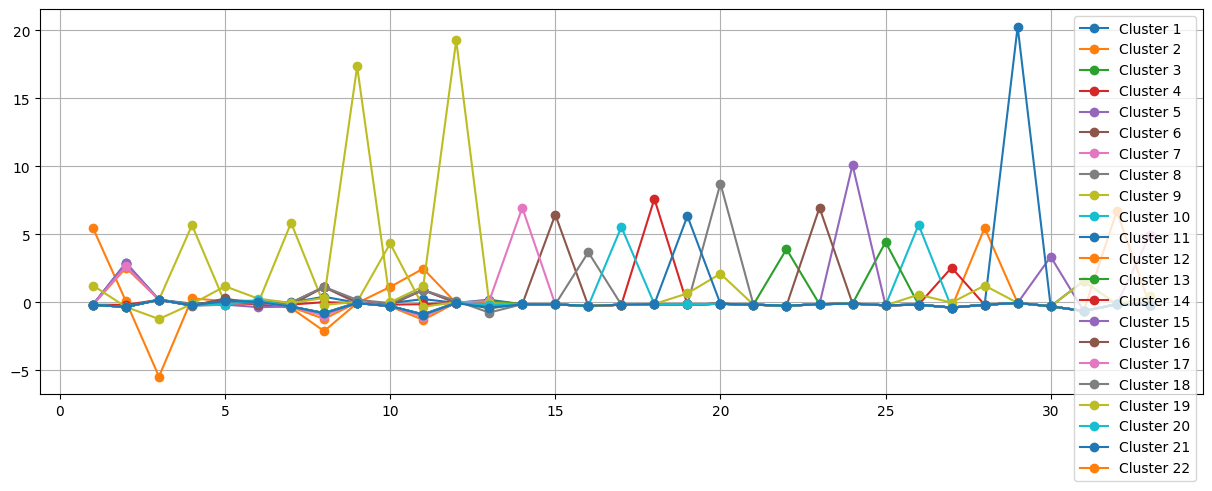

In [92]:
plt.figure(figsize=(15,5))
for i in range(1, 23):
    plt.plot(range(1, df_ss.shape[1]+1), np.mean(df_ss[kmeans.labels_ == i], axis=0), marker='o', label=f'Cluster {i}')
plt.legend(loc='best')
plt.grid()
plt.show()

На этом графике видно что признаки кластеров сомнительно отличаются друг от друга, попробую провести кластеризацию только с числовыми переменными

##Кластеризация с измененным датасетом

In [93]:
df.columns

Index(['product_name', 'contract_status', 'currency_name', 'duration', 'age',
       'sex', 'price', 'insurance_amount', 'loss_payout_amt', 'price_usd',
       'insurance_amount_usd', 'loss_payout_amt_usd', 'anomaly',
       'country_Азербайджан', 'country_Аргентина', 'country_Армения',
       'country_Беларусь', 'country_Болгария', 'country_Великобритания',
       'country_Германия', 'country_Грузия', 'country_Египет',
       'country_Индонезия', 'country_Иран', 'country_Казахстан',
       'country_Канада', 'country_ОАЭ', 'country_США', 'country_Сирия',
       'country_Таиланд', 'country_Турция', 'country_Узбекистан',
       'country_Франция'],
      dtype='object')

In [94]:
df_new = df[['duration', 'age',
    'sex', 'price', 'insurance_amount', 'loss_payout_amt', 'price_usd',
    'insurance_amount_usd', 'loss_payout_amt_usd', 'anomaly']]

df_new.head()

,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,10,20,1,1096,2000000,0,12.41768,22660.000080,0.0,1
1,7,55,1,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,10,61,0,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,14,25,1,1534,2000000,0,17.38022,22660.000080,0.0,1
4,7,33,1,1918,5000000,0,21.73094,56650.000199,0.0,-1


In [95]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

In [96]:
wcss = []
silh=[]

for i in range(2,26):
    kmeans = KMeans(n_clusters = i, max_iter=300, n_init=10, random_state=23).fit(df_scaled)
    preds = kmeans.predict(df_scaled)
    wcss.append(kmeans.inertia_)
    silh.append(silhouette_score(df_scaled, preds))

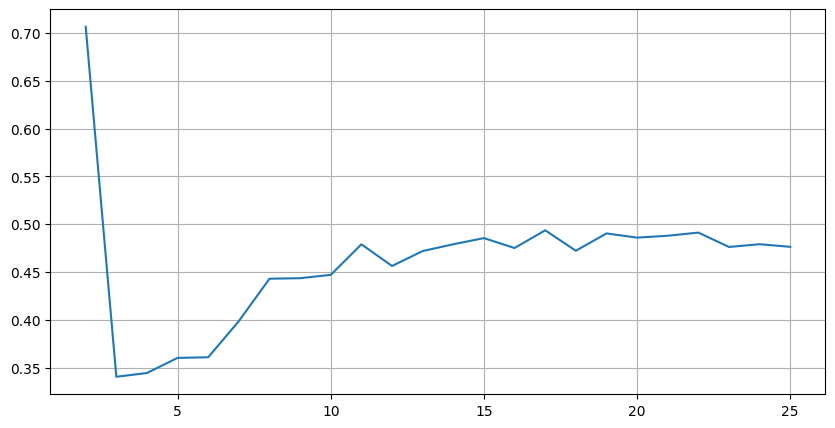

In [97]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 26), silh)
plt.grid()
plt.show()

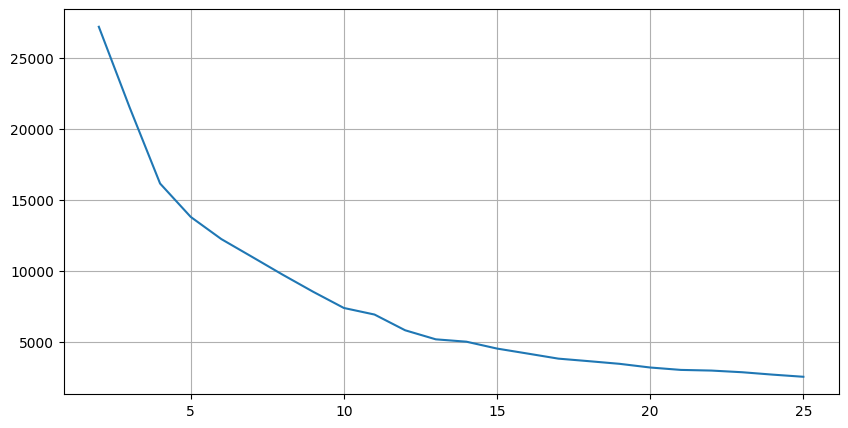

In [98]:
plt.figure(figsize=(10,5))
plt.plot(range(2, 26), wcss)
plt.grid()
plt.show()

Берем 11 кластеров

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


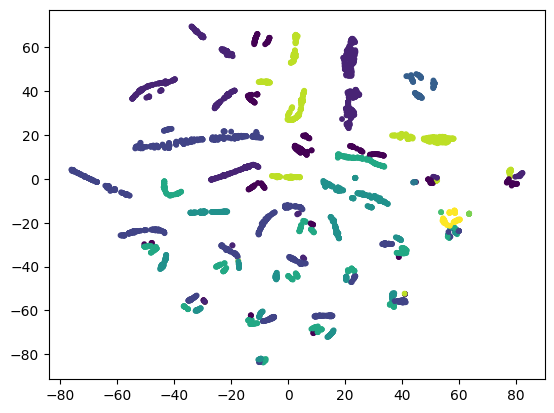

In [99]:
kmeans = KMeans(n_clusters=11).fit(df_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=kmeans.labels_)

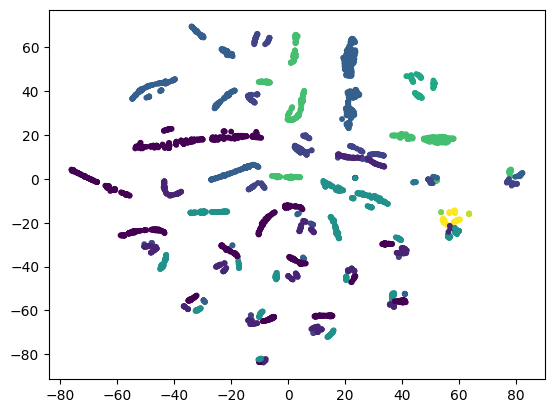

In [100]:
clustering = AgglomerativeClustering(n_clusters=11).fit(df_scaled)
plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=clustering.labels_)

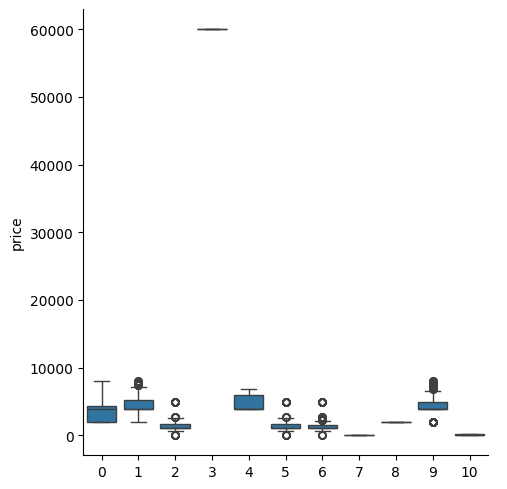

In [101]:
sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='price')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


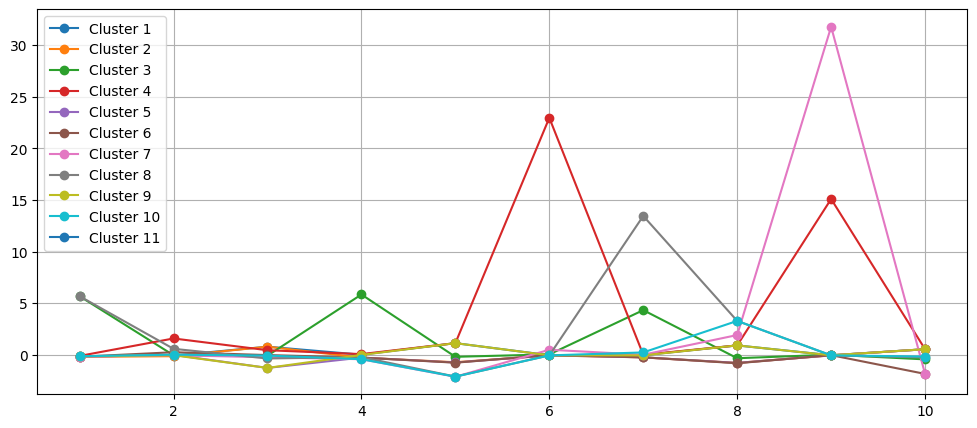

In [102]:
plt.figure(figsize=(12,5))
for i in range(1, 12):
    plt.plot(range(1, df_scaled.shape[1]+1), np.mean(df_scaled[kmeans.labels_ == i], axis=0), marker='o', label=f'Cluster {i}')
plt.legend(loc='best')
plt.grid()
plt.show()

Результат снова не особо впечатляющий, кластеры отличаются друг от дружки весьма слабо(за исключением всего пары), попробуем уменьшить количество кластеров, чтобы похожие кластеры объединились в один

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


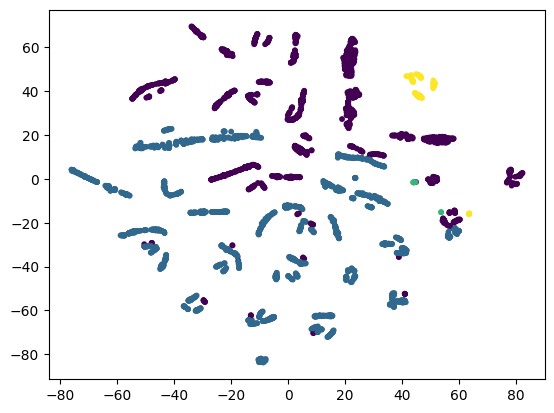

In [103]:
kmeans = KMeans(n_clusters=4).fit(df_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=kmeans.labels_)

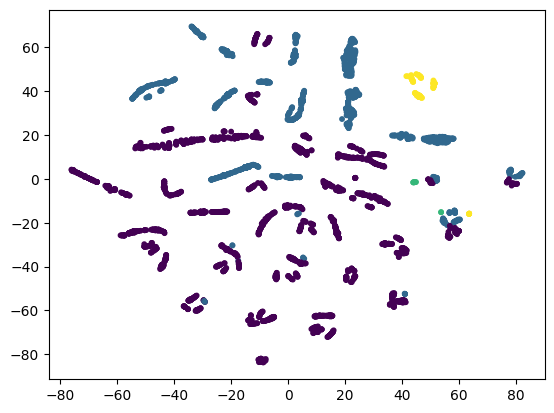

In [104]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df_scaled)
plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=clustering.labels_)

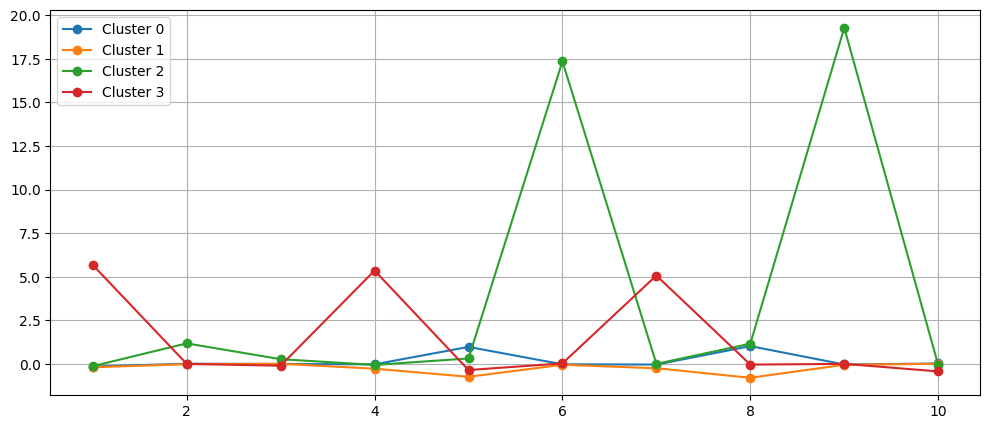

In [105]:
plt.figure(figsize=(12,5))
for i in range(4):
    plt.plot(range(1, df_scaled.shape[1]+1), np.mean(df_scaled[kmeans.labels_ == i], axis=0), marker='o', label=f'Cluster {i}')
plt.legend(loc='best')
plt.grid()
plt.show()

In [106]:
df_new.head()

,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,10,20,1,1096,2000000,0,12.41768,22660.000080,0.0,1
1,7,55,1,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,10,61,0,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,14,25,1,1534,2000000,0,17.38022,22660.000080,0.0,1
4,7,33,1,1918,5000000,0,21.73094,56650.000199,0.0,-1


<ipython-input-107-26b7cf85e197>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='price', palette='hls')


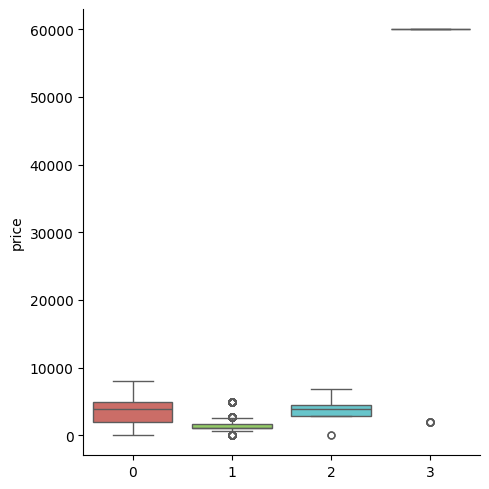

In [107]:
sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='price', palette='hls')
plt.show()

<ipython-input-108-190e6832a14a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='loss_payout_amt', palette='hls')


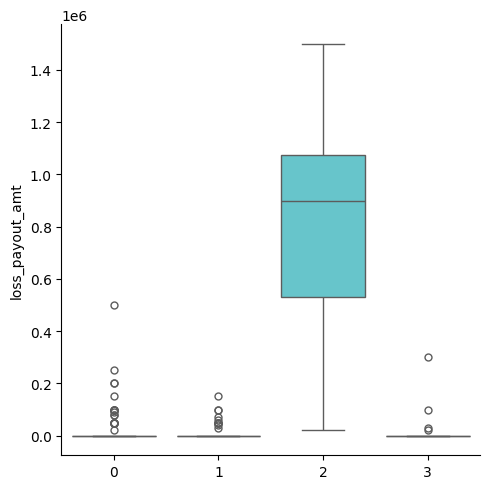

In [108]:
sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='loss_payout_amt', palette='hls')
plt.show()

<ipython-input-109-e595533a37c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='age', palette='hls')


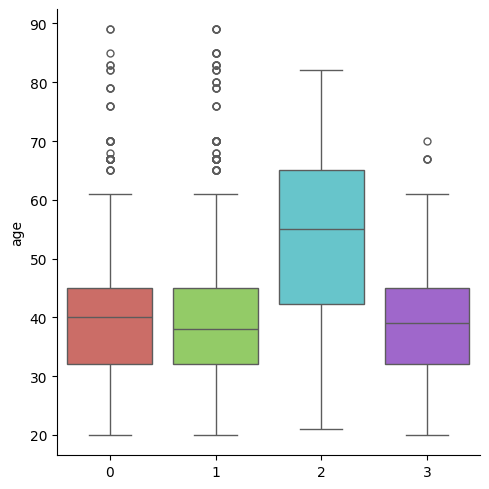

In [109]:
sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='age', palette='hls')
plt.show()

<ipython-input-110-7fd6a18ad62e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='anomaly', palette='hls')


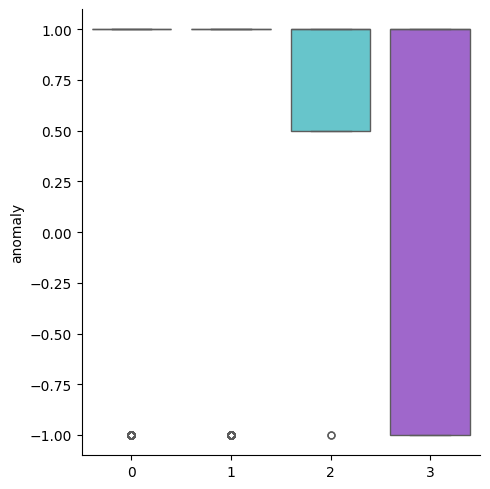

In [110]:
sns.catplot(kind="box", data=df_new, x=kmeans.labels_, y='anomaly', palette='hls')
plt.show()

##Кластеризация методом KPrototypes

In [112]:
df_copy.head()

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0,12.41768,22660.000080,0.0,1
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0,17.38022,22660.000080,0.0,1
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1


In [113]:
num_cols = ['duration', 'age', 'price', 'insurance_amount', 'loss_payout_amt', 'price_usd', 'insurance_amount_usd', 'loss_payout_amt_usd']

In [114]:
cat_cols = ['contract_num', 'product_name', 'contract_status', 'currency_name', 'country', 'sex']

In [115]:
ss = StandardScaler()
df_num_ss1 = ss.fit_transform(df_copy[num_cols])

In [116]:
le = LabelEncoder()
enc = le.fit_transform(df_copy['product_name'])
df_copy['product_name'] = enc

le = LabelEncoder()
enc = le.fit_transform(df_copy['contract_status'])
df_copy['contract_status'] = enc

le = LabelEncoder()
enc = le.fit_transform(df_copy['currency_name'])
df_copy['currency_name'] = enc

le = LabelEncoder()
enc = le.fit_transform(df_copy['sex'])
df_copy['sex'] = enc

le = LabelEncoder()
enc = le.fit_transform(df_copy['country'])
df_copy['country'] = enc

le = LabelEncoder()
enc = le.fit_transform(df_copy['contract_num'])
df_copy['contract_num'] = enc

df.head()

,product_name,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,...,country_Иран,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция
0,0,0,1,10,20,1,1096,2000000,0,12.41768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,7,55,1,1918,5000000,0,21.73094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,10,61,0,1096,2000000,0,12.41768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,14,25,1,1534,2000000,0,17.38022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,7,33,1,1918,5000000,0,21.73094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
df_copy[num_cols] = df_num_ss1
df_copy.head(3)

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,74,0,0,1,-0.235038,3,-1.828189,1,-0.321540,-0.857818,-0.059217,-0.288156,-0.953246,-0.055943,1
1,74,0,0,1,-0.284973,9,1.383213,1,-0.235502,1.127565,-0.059217,-0.223748,0.908508,-0.055943,-1
2,3,0,0,1,-0.235038,3,1.933740,0,-0.321540,-0.857818,-0.059217,-0.288156,-0.953246,-0.055943,-1


In [118]:
#kpr = KPrototypes(n_clusters=4).fit(df_copy, categorical=[0,1,2,3,5,7])
#plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=kpr.labels_)

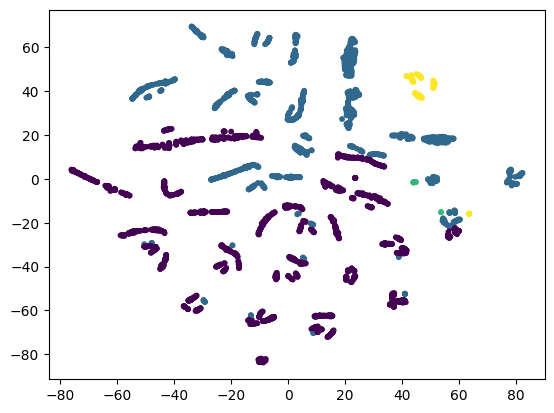

In [119]:
kpr = KPrototypes(n_clusters=4).fit(df_copy, categorical=list(range(len(cat_cols))))
plt.scatter(df_tsne[:,0], df_tsne[:,1], s=10, c=kpr.labels_)

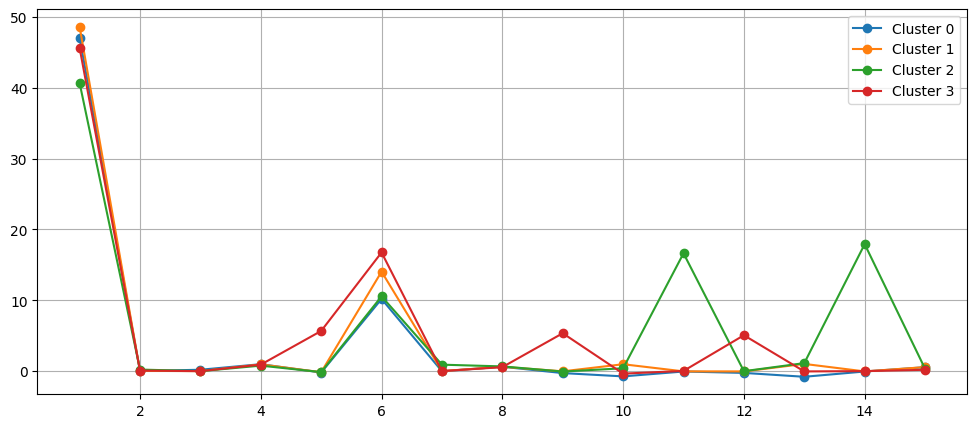

In [120]:
plt.figure(figsize=(12,5))
for i in range(4):
    plt.plot(range(1, df_copy.shape[1]+1), np.mean(df_copy[kpr.labels_ == i], axis=0), marker='o', label=f'Cluster {i}')
plt.legend(loc='best')
plt.grid()
plt.show()

<ipython-input-121-d037fa3937c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", data=df_copy, x=kpr.labels_, y='price', palette='hls')


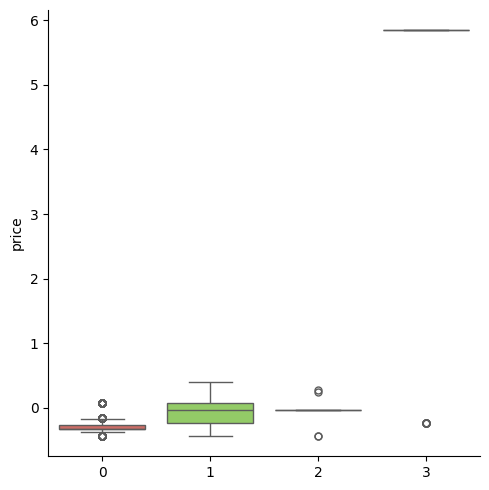

In [121]:
sns.catplot(kind="box", data=df_copy, x=kpr.labels_, y='price', palette='hls')
plt.show()

Из всего что я произвел выше, я могу сделать вывод о том, что наши данные довольно сложные и не поддаются кластеризации. Четкие кластеры на этих данных выделяться не будут. Могу предположить, что это происходит из за того, что люди разных возрастов из разных стран покупают страховки, но далеко не все колечатся (или что предусматривает страховка) и получают выплаты. Тут даже интуитивно сложно выделить кластеры, т.к. не люди выбирают - получить страховку или нет. Тут дело случая, даже, я бы сказал, некоей статистики, поэтому и сложно выделить четкие кластеры